# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective

The objective of this experiment is to understand calculating entropy in Decision tree classifier

### Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Demo_Entropy_Animals" #name of the notebook
Answer = "Ungraded"
def setup(): 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Test.csv.zip")
    ipython.magic("sx unzip Test.csv.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("Test.csv").values
data.shape
 

(91, 3)

In [17]:
data.ndim

2

In [7]:
X = data[:,0]
y = data[:,1]
print('X: ',X.ndim, " y: ",y.ndim)

X:  1  y:  1


Matplotlib has a number of built-in colormaps where cmap can be used if c is an array of floats, For more details refer to the following [link](https://matplotlib.org/tutorials/colors/colormaps.html)

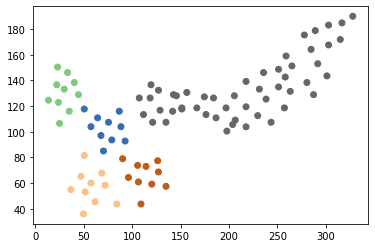

In [23]:
plt.scatter(X,y, c=data[:,2], cmap="Accent")
plt.show()

Entropy $H$ = $-\sum_{i}P_{i}\log_{2}(P_{i})$ where $P_{i}$ is the probability of the $i$ th class.

Total number of data points = $91$
 
 Total number of classes = $5$

Here, we are considering $P_{i}$ as following:

$P_{i}$ = number of data points in $i$ th class/Total number of data points

Initial Entropy = $-\frac{10}{91}\log_{2}(\frac{10}{91})- \frac{10}{91}\log_{2}(\frac{10}{91}) -\frac{10}{91}\log_{2}(\frac{10}{91})-\frac{10}{91}\log_{2}(\frac{10}{91}) - \frac{51}{91}\log_{2}(\frac{51}{91})$ = $-4\times\frac{10}{91}\log_{2}(\frac{10}{91}) - \frac{51}{91}\log_{2}(\frac{51}{91})$ = $1.86$

#### Exercise 1

Calculating the entropy when the data is split at  $X=150$

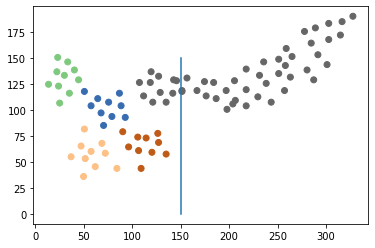

In [21]:
plt.scatter(X,y, c=data[:,2],cmap="Accent")
plt.plot([150,150],[150,0])
plt.show()

In this example, we have $5$ classes on left and $1$ class on right of $X=150$. 

Left side Entropy = $-\frac{10}{51}\log_{2}(\frac{10}{51}) -\frac{10}{51}\log_{2}(\frac{10}{51})-\frac{10}{51}\log_{2}(\frac{10}{51})-\frac{10}{51}\log_{2}(\frac{10}{51})- \frac{11}{51}\log_{2}(\frac{11}{51})$ = $-4\times\frac{10}{51}\log_{2}(\frac{10}{51}) - \frac{11}{51}\log_{2}(\frac{11}{51}) = 2.322$

Right side Entropy = $-\frac{40}{40}\log_{2}(\frac{40}{40}) = -1\log_{2}(1) = 0$

Total Entropy = Left side Entropy + Right side Entropy = $(\frac{51}{91})2.322 +(\frac{40}{91}) 0 = 1.301$

#### Exercise 2

Calculating the entropy when the data is split at  $X=100$



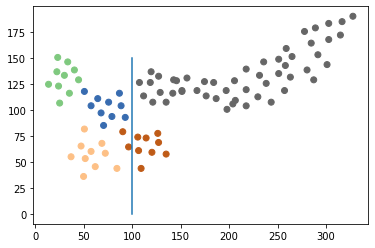

In [10]:
plt.scatter(X,y, c=data[:,2],cmap="Accent")
plt.plot([100,100],[150,0])
plt.show()

Entropy $H$ = $-\sum_{i}P_{i}\log_{2}(P_{i})$ where $P_{i}$ is the probability of the $i$ th class.

Total number of data points = $91$

For calculating total entropy, lets consider data on both right and left of $X=100$.

We have $4$ classes on left and $2$ classes on right. 

Here, we are considering $P_{i}$ as following:

$P_{i}$ = number of data points in $i$ th class/Total number of points in the left/right side of the split.

Left side Entropy = $-\frac{10}{32}\log_{2}(\frac{10}{32})- \frac{10}{32}\log_{2}(\frac{10}{32}) -\frac{10}{32}\log_{2}(\frac{10}{32}) - \frac{2}{32}\log_{2}(\frac{2}{32})$ =
$-3\times\frac{10}{32}\log_{2}(\frac{10}{32}) - \frac{2}{32}\log_{2}(\frac{2}{32})$ = $1.823$

Right side Entropy = $-\frac{8}{59}\log_{2}(\frac{8}{59}) - \frac{51}{59}\log_{2}(\frac{51}{59})$ =$ 0.571$

Total Entropy = Left side Entropy + Right side Entropy = $(\frac{32}{91})1.823 +(\frac{59}{91})0.571=1.011$

#### Exercise 3

Calculating the entropy when the data is split at  $y=85$

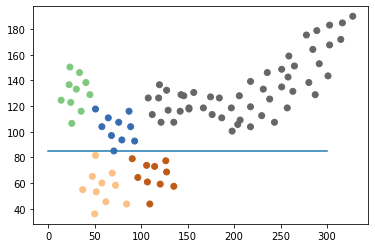

In [11]:
plt.scatter(X,y, c=data[:,2],cmap="Accent")
plt.plot([0,300],[85,85])
plt.show()

In this example, for calculating total entropy, lets consider data on both below and above of $y=85$.

We have $2$ classes below and $3$ classes on above. 

Below Entropy = $-\frac{10}{20}\log_{2}(\frac{10}{20})-\frac{10}{20}\log_{2}(\frac{10}{20})$=$-2\times\frac{10}{20}\log_{2}(\frac{10}{20}) = 1$

Above Entropy = $-\frac{10}{71}\log_{2}(\frac{10}{71})- \frac{10}{71}\log_{2}(\frac{10}{71})- \frac{51}{71}\log_{2}(\frac{51}{71}) $=$-2\times\frac{10}{71}\log_{2}(\frac{10}{71}) - \frac{51}{71}\log_{2}(\frac{51}{71}) = 1.336$ 

Total Entropy = Below Entropy + Above Entropy = $(\frac{20}{91})1 +(\frac{71}{91}) 1.336 = 1.262$

## Please answer the questions below to complete the experiment:

In [12]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [13]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Nothing" #@param {type:"string"}


In [14]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [15]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [16]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2568
Date of submission:  12 Sep 2020
Time of submission:  11:04:40
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
